In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [11]:
SMA10 = spy['Close'].rolling(window = 10).mean()
SMA20 = spy['Close'].rolling(window = 20).mean()
SMA50 = spy['Close'].rolling(window = 50).mean()
SMA100 = spy['Close'].rolling(window = 100).mean()

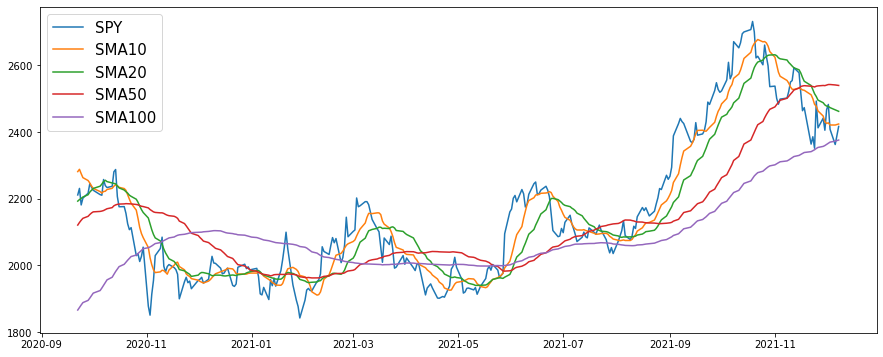

In [12]:
# taking last 300 trading days
plt.figure(figsize=(15, 6))
plt.plot(spy['Close'][-300:], label='SPY')
plt.plot(SMA10[-300:], label='SMA10')
plt.plot(SMA20[-300:], label='SMA20')
plt.plot(SMA50[-300:], label='SMA50')
plt.plot(SMA100[-300:], label='SMA100')
plt.legend(loc='upper left', fontsize=15)

In [13]:
def get_points_above(sma_low, sma_high):
    points_above = {}
    for pair in zip(sma_low, sma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index[0]
            points_above[date] = pair[0]
            
    points_above = pd.Series(points_above, name='Price_Points')
    points_above.index.name = 'Date'
            
    return points_above
points_above_SMA50 = get_points_above(SMA20, SMA50)

In [14]:
SMA20 = SMA20.reset_index()
SMA50 = SMA50.reset_index()

In [15]:
crossovers = pd.DataFrame()
crossovers['Dates'] = SMA20['Date']
crossovers['Price'] = [i for i in spy['Close']]
crossovers['SMA20'] = SMA20['Close']
crossovers['SMA50'] = SMA50['Close']
crossovers['position'] = crossovers['SMA20'] >= crossovers['SMA50']
crossovers['pre-position'] = crossovers['position'].shift(1)
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)
crossovers['Crossover'][0] = False
print(crossovers)

          Dates        Price        SMA20        SMA50  position pre-position  \
0    1996-01-01    15.917452          NaN          NaN     False          NaN   
1    1996-01-02    15.793671          NaN          NaN     False        False   
2    1996-01-03    15.913584          NaN          NaN     False        False   
3    1996-01-04    15.766594          NaN          NaN     False        False   
4    1996-01-05    15.658285          NaN          NaN     False        False   
...         ...          ...          ...          ...       ...          ...   
6519 2021-12-01  2467.000000  2477.895007  2540.812998     False        False   
6520 2021-12-02  2482.850098  2476.997510  2542.582998     False        False   
6521 2021-12-03  2408.250000  2473.230005  2542.653999     False        False   
6522 2021-12-06  2362.600098  2466.417505  2541.296001     False        False   
6523 2021-12-08  2416.699951  2462.155005  2539.832002     False        False   

      Crossover  
0        

<ipython-input-15-adeccaea3821>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Crossover'][0] = False


In [16]:
crossovers = crossovers.loc[crossovers['Crossover'] == True]
crossovers = crossovers.reset_index()
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0
for i in range(len(crossovers['SMA20'])):
    if crossovers['SMA20'][i] > crossovers['SMA50'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'
print(crossovers)

         Dates        Price        SMA20        SMA50 Signal  Binary_Signal
0   1996-03-08    16.954117    17.245195    15.669116    Buy            1.0
1   1996-04-04    16.137936    16.335406    16.426888   Sell            0.0
2   1996-04-23    18.269289    16.905378    16.886192    Buy            1.0
3   1996-06-17    18.733467    18.655911    18.665465   Sell            0.0
4   1996-08-12    16.095387    16.704234    16.701681    Buy            1.0
..         ...          ...          ...          ...    ...            ...
161 2021-04-12  1911.150024  2030.470007  2037.628010   Sell            0.0
162 2021-06-02  2201.250000  1997.307507  1987.858005    Buy            1.0
163 2021-07-22  2120.699951  2104.812500  2112.592998   Sell            0.0
164 2021-08-26  2230.449951  2127.612500  2124.893000    Buy            1.0
165 2021-11-23  2385.850098  2527.497522  2536.649004   Sell            0.0

[166 rows x 6 columns]


<ipython-input-16-f3af89fdbc94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Binary_Signal'][i] = 1.0
<ipython-input-16-f3af89fdbc94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Signal'][i] = 'Buy'
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-f3af89fdbc94>:11: SettingWithC

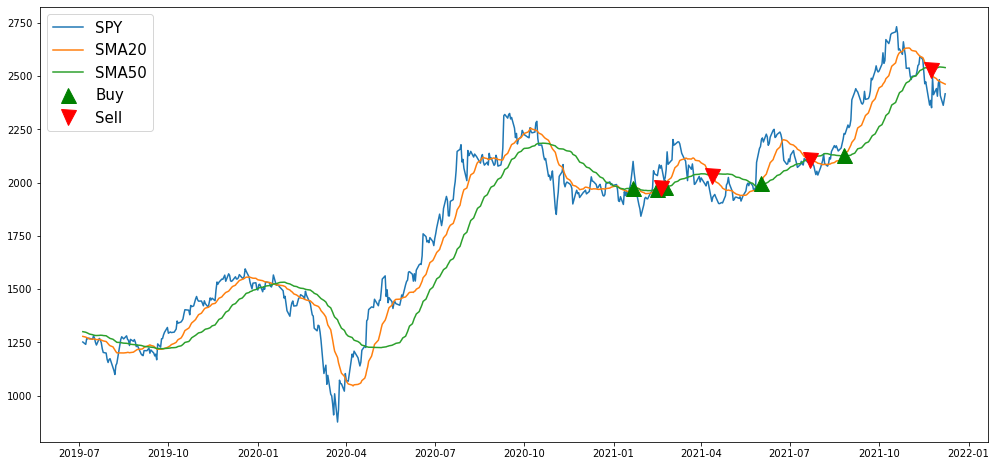

In [17]:
# taking last 600 trading days
SMA20 = spy['Close'].rolling(window=20).mean()
SMA50 = spy['Close'].rolling(window=50).mean()
plt.figure(figsize=(17, 8))
plt.plot(spy['Close'][-600:], label='SPY')
plt.plot(SMA20[-600:], label='SMA20')
plt.plot(SMA50[-600:], label='SMA50')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['Dates'][-5:], 
         crossovers['SMA20'][crossovers.Signal == 'Buy'][-5:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['Dates'][-4:], 
         crossovers['SMA20'][crossovers.Signal == 'Sell'][-4:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)

In [2]:
print("My name is Manas")

My name is Manas


PyEXception: Old IEX API is deprecated. For a free API token, sign up at https://iexcloud.io

In [2]:
!pip install yfinance
!pip install yahoofinancials

  Using cached yfinance-0.1.67-py2.py3-none-any.whl (25 kB)
Processing c:\users\asus\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500\multitasking-0.0.10-py3-none-any.whl
Processing c:\users\asus\appdata\local\pip\cache\wheels\6a\90\0c\08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809\yahoofinancials-1.6-py3-none-any.whl


In [2]:
aapl_df = yf.download('RELIANCE.NS', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1096.698975,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1082.415283,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1069.061401,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1074.833496,8545382
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1080.801270,5565822


In [9]:
aapl_df = yf.download('AAPL', 
                      start='2022-03-11', 
                      end='2022-03-22', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-10,160.199997,160.389999,155.979996,158.520004,158.520004,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,154.729996,96836300
2022-03-14,151.449997,154.119995,150.100006,150.619995,150.619995,108732100
2022-03-15,150.899994,155.570007,150.380005,155.089996,155.089996,92964300
2022-03-16,157.050003,160.000000,154.460007,159.589996,159.589996,102300200


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spy_ticker = yf.Ticker('RELIANCE.NS')
spy = yf.download('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


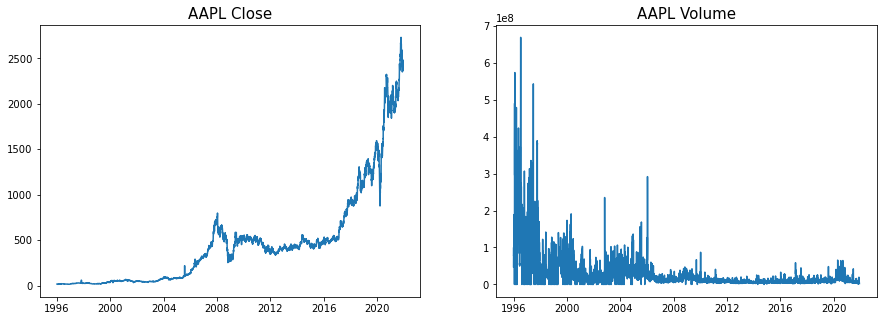

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5))
ax[0].set_title('AAPL Close', fontsize=15)
ax[0].plot(spy['Close'])
ax[1].set_title('AAPL Volume', fontsize=15)
ax[1].plot(spy['Volume'])

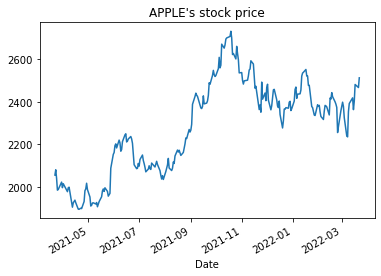

In [8]:
ticker = yf.Ticker('RELIANCE.NS')
aapl_df = ticker.history(period="1y")
aapl_df['Close'].plot(title="APPLE's stock price")

In [10]:
yahoo_financials = YahooFinancials('RELIANCE.NS')
data = yahoo_financials.get_historical_price_data(start_date='2022-03-11', 
                                                  end_date='2022-03-22', 
                                                  time_interval='weekly')
aapl_df = pd.DataFrame(data['AAPL']['prices'])
aapl_df = aapl_df.drop('date', axis=1).set_index('formatted_date')
aapl_df.head()

KeyError: 'AAPL'